<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/employees.csv")
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [3]:
df0 = df.copy()
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [10]:
df10 = df0.copy()
df0.head()
df0["Start Date"] = pd.to_datetime(df0["Start Date"])
df0.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services


In [11]:
df0.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [12]:
df0.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [15]:
df0["Gender"] = df0["Gender"].fillna("Unspecified")


In [16]:
df0.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [18]:
df0["Gender"].nunique()

3

In [21]:
df0.head()
df0.isnull().sum()
df2 = df0.copy()

In [22]:
df0.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [23]:
df0["Senior Management"] = df0["Senior Management"].fillna(df0["Senior Management"].mode().values[0])
df0.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [27]:
df21 = df0.dropna(axis = 0, how = "any")
df21.head()
df21.shape

In [33]:

df21.head()

,Female,Male,Unspecified
0,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,1,0


In [41]:
df0.head()
df0.nunique()
df0.isnull().sum()
df5 = df0.dropna(axis = 0, how = "any")
df5.head()
df5.isnull().sum()
df5.shape
df50 = df5.join(df21)
df50.head()
df51 = df50.copy()

<Axes: xlabel='Salary', ylabel='Count'>

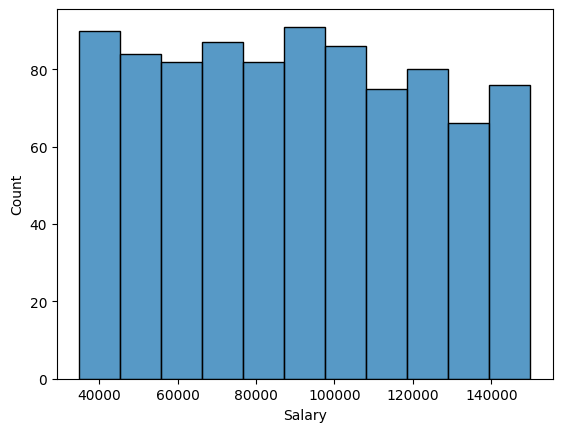

In [43]:
#Data Visualization
#Histogram
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = df50, x= df50["Salary"])

<Axes: xlabel='Salary', ylabel='Team'>

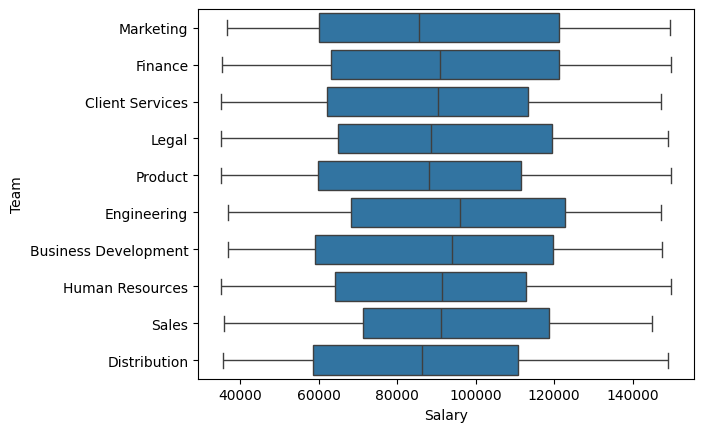

In [45]:
#Boxplot
sns.boxplot(data = df50, x = df50["Salary"], y = df50["Team"])

#Handling Outliers; A a case of iris dataset

In [46]:
df_0 = pd.read_csv("/content/Iris dataset.csv")
df_0.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalWidthCm'>

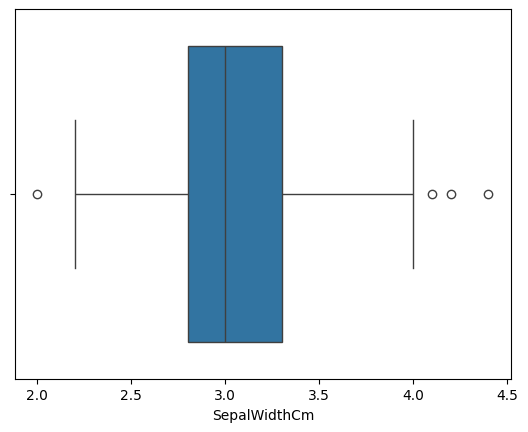

In [47]:
#We use the SepalWidthCm column to detect and handle outliers
sns.boxplot(data = df_0, x = df_0["SepalWidthCm"])

#In the above graph, the values above 4 and below 2 are acting as outliers.

Old Shape:  (150, 6)
Lower bound: (array([60]),)
Upper bound: (array([15, 32, 33]),)
New Shape: (146, 6)


<Axes: xlabel='SepalWidthCm'>

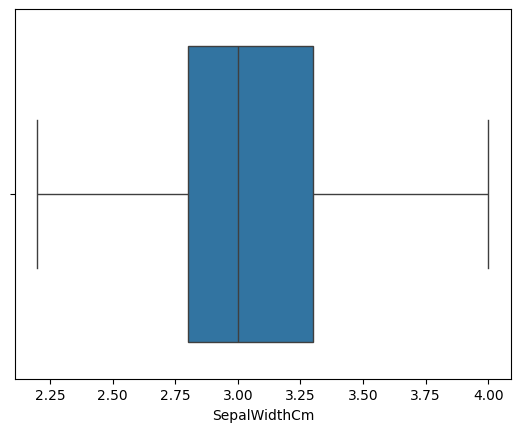

In [54]:
#First get the Interquartile Range
#IQR = Q3-Q1
import numpy as np
Q1 = np.percentile(df_0["SepalWidthCm"], 25, interpolation = "midpoint")
Q3 = np.percentile(df_0["SepalWidthCm"], 75, interpolation= "midpoint")
IQR = (Q3 - Q1)
print("Old Shape: ", df_0.shape)
#Calculate the lower_bound and upper_bound
Upper_bound = np.where(df_0["SepalWidthCm"] >= (Q3+1.5*IQR)) # Upper Quartile + Interval * Interquartile Range
Lower_bound = np.where(df_0["SepalWidthCm"] <= (Q1-1.5*IQR)) #Lower Quartile  - Interval * Interquartile Range
print(f"Lower bound: {Lower_bound}")
print(f"Upper bound: {Upper_bound}")
# Removing the Outliers
df_0.drop(Upper_bound[0], inplace = True)
df_0.drop(Lower_bound[0], inplace = True)
print(f"New Shape: {df_0.shape}")
sns.boxplot(df_0, x = df_0["SepalWidthCm"])